## 一、什么是t-SNE？

t-SNE是一种非线性降维技术，主要用于高维数据的可视化。由Laurens van der Maaten和Geoffrey Hinton于2008年提出，t-SNE通过将高维数据映射到二维或三维空间，保留数据的局部结构，使得在低维空间中的数据点分布能够反映出高维空间中的相似性与簇结构。t-SNE广泛应用于图像处理、自然语言处理、生物信息学等领域的数据探索与分析。

## 二、t-SNE的算法原理

t-SNE的核心思想是将高维数据点之间的相似性转化为低维空间中的概率分布，并通过最小化这两个分布之间的Kullback-Leibler散度（KL散度），实现数据的有效降维。

### 2.1 高维空间中的相似性

首先，对于高维空间中的数据点$\mathbf{x}_i$和$\mathbf{x}_j$，t-SNE通过高斯分布计算它们之间的相似性：

$$
p_{j|i} = \frac{\exp\left(-\frac{||\mathbf{x}_i - \mathbf{x}_j||^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{||\mathbf{x}_i - \mathbf{x}_k||^2}{2\sigma_i^2}\right)}
$$

其中，$\sigma_i$是与数据点$\mathbf{x}_i$相关的高斯分布的方差，通过二分搜索方法调整，使得条件概率的熵达到一个预设的值，确保每个数据点的近邻数量一致。

接着，通过对称化条件概率，得到高维空间中点对之间的联合概率：

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$

其中，$N$是数据点的总数。

### 2.2 低维空间中的相似性

在低维空间中，t-SNE使用学生t分布（自由度为1，即柯西分布）来计算点对之间的相似性：

$$
q_{ij} = \frac{(1 + ||\mathbf{y}_i - \mathbf{y}_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||\mathbf{y}_k - \mathbf{y}_l||^2)^{-1}}
$$

这里，$\mathbf{y}_i$和$\mathbf{y}_j$是低维空间中的映射点。

### 2.3 优化目标

t-SNE的目标是最小化高维与低维空间中点对相似性分布的KL散度：

$$
KL(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

通过梯度下降等优化方法，t-SNE逐步调整低维空间中的点位置，使得KL散度最小化，从而达到高维数据的有效降维与可视化。

### 2.4 关键特点

- **保留局部结构**：t-SNE擅长保留数据的局部邻域结构，使得相似的数据点在低维空间中保持相近。
- **处理非线性关系**：与PCA等线性降维方法不同，t-SNE能够捕捉数据中的非线性关系。
- **参数敏感性**：t-SNE的效果对超参数（如学习率、邻居数）较为敏感，需要根据具体数据进行调整。
- **计算复杂度**：由于需要计算所有点对之间的相似性，t-SNE在处理大规模数据时计算开销较大，但近年来通过近似算法和并行计算得到了优化。


## 三、案例分析

我们将生成一个包含四个簇的高维数据集，然后通过t-SNE将其映射到二维空间，以观察t-SNE在不同簇之间的分离效果。


Data shape: (1000, 50)
Reduced data shape: (1000, 2)


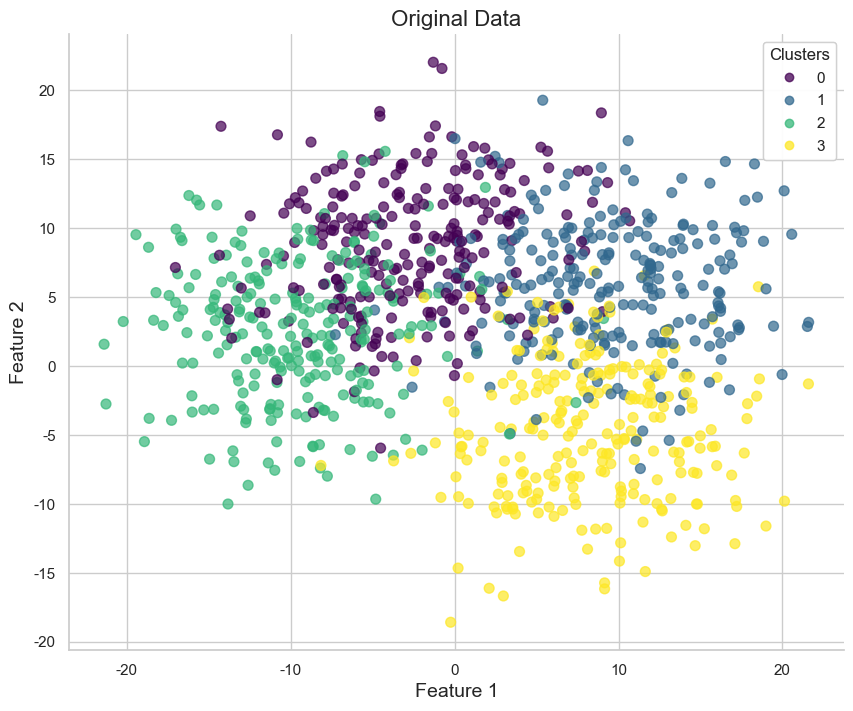

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import matplotlib as mpl

# 设置matplotlib配置以避免中文字体相关的警告
mpl.rcParams['font.sans-serif'] = ['Arial']  # 使用Arial字体
mpl.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 设置随机种子，确保结果可重复
np.random.seed(42)

# 生成模拟数据
n_samples = 1000
n_features = 50
n_clusters = 4
cluster_std = 5.0
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=cluster_std, random_state=random_state)
print(f"Data shape: {X.shape}")

# 初始化t-SNE，使用max_iter代替n_iter以消除FutureWarning
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=random_state)

# 执行降维
X_embedded = tsne.fit_transform(X)
print(f"Reduced data shape: {X_embedded.shape}")

# 设置Seaborn风格
sns.set(style="whitegrid", context="notebook", palette="deep")

# 绘制原始数据（使用前两个特征）
plt.figure(figsize=(10, 8))
scatter_orig = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Original Data', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# 创建图例
legend_orig = plt.legend(*scatter_orig.legend_elements(), title="Clusters")
plt.gca().add_artist(legend_orig)

# 隐藏顶端和右侧边框
sns.despine()

# 展示原始数据图
plt.show()


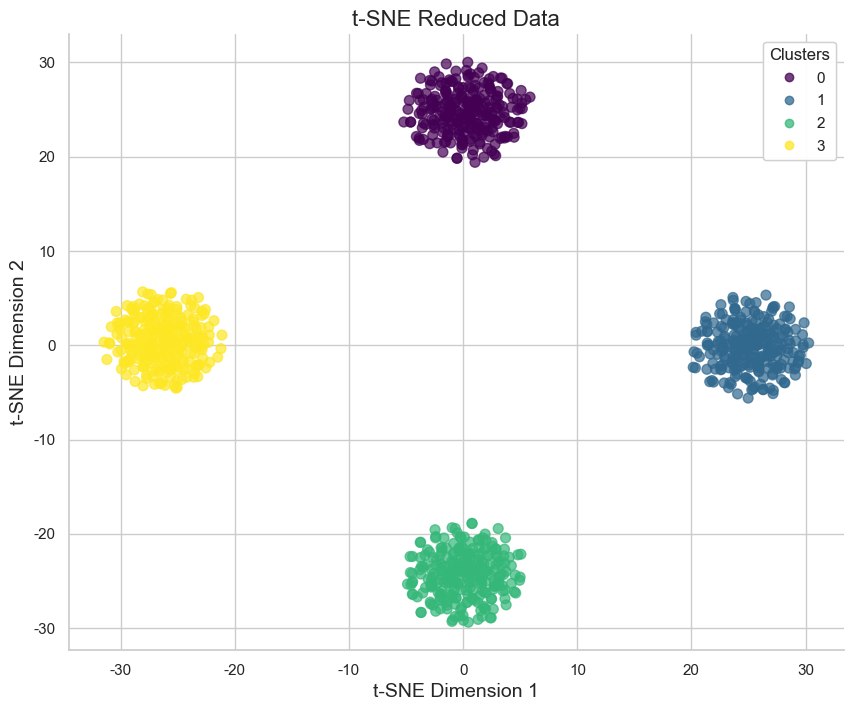

In [2]:
# 绘制t-SNE降维后的数据
plt.figure(figsize=(10, 8))
scatter_tsne = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('t-SNE Reduced Data', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)

# 创建图例
legend_tsne = plt.legend(*scatter_tsne.legend_elements(), title="Clusters")
plt.gca().add_artist(legend_tsne)

# 隐藏顶端和右侧边框
sns.despine()

# 展示t-SNE降维后的数据图
plt.show()